In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Spice_projects/week_11_final_project/tryout



In [3]:
large_symptoms_df = pd.read_csv('corona_tested_individuals_ver_0083_english.csv',dtype={'corona_result': 'str'}, parse_dates=True )


/Users/tosinoyewale/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
large_symptoms_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [ ]:
# The data already comes with 0 and 1 but I will like to convert to yes and no. I want it to look like data I will get from a user

In [7]:
large_symptoms_df.replace(0, 'no', inplace=True)
large_symptoms_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,no,no,no,no,no,negative,No,male,Other
1,2020-11-12,no,1,no,no,no,negative,No,male,Other
2,2020-11-12,no,no,no,no,no,negative,Yes,female,Other
3,2020-11-12,no,no,no,no,no,negative,No,male,Other
4,2020-11-12,no,1,no,no,no,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,no,no,no,no,no,negative,NaN,female,Other
2742592,2020-03-11,no,no,no,no,no,negative,NaN,female,Other
2742593,2020-03-11,no,no,no,no,no,other,NaN,male,Other
2742594,2020-03-11,no,no,no,no,no,negative,NaN,female,Other


In [10]:
large_symptoms_df.replace(1, 'yes', inplace=True)
large_symptoms_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,no,no,no,no,no,negative,No,male,Other
1,2020-11-12,no,yes,no,no,no,negative,No,male,Other
2,2020-11-12,no,no,no,no,no,negative,Yes,female,Other
3,2020-11-12,no,no,no,no,no,negative,No,male,Other
4,2020-11-12,no,yes,no,no,no,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,no,no,no,no,no,negative,NaN,female,Other
2742592,2020-03-11,no,no,no,no,no,negative,NaN,female,Other
2742593,2020-03-11,no,no,no,no,no,other,NaN,male,Other
2742594,2020-03-11,no,no,no,no,no,negative,NaN,female,Other


In [13]:
large_symptoms_df.corona_result.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [83]:
large_symptoms_df.test_indication.unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [14]:
large_symptoms_df.iloc[:, 7].unique()


array(['No', 'Yes', nan], dtype=object)

In [15]:
large_symptoms_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                object
 2   fever                object
 3   sore_throat          object
 4   shortness_of_breath  object
 5   head_ache            object
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: object(10)
memory usage: 209.2+ MB


In [16]:
large_symptoms_df.isna().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [17]:
large_symptoms_df.age_60_and_above.unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
large_symptoms_df.gender.unique()

array(['male', 'female', nan], dtype=object)

In [19]:
# 20% of this column has missing values, using most frequent to fill the missing values will bias the dataset a lot. 

# I will try to model with or without this column using most frequent imputation. if this column is not important, then I will drop it


percentage_missingvalue_age_60_and_above = (547644/ 2742596)*100
percentage_missingvalue_age_60_and_above

19.968088628438167

<AxesSubplot:xlabel='age_60_and_above', ylabel='count'>

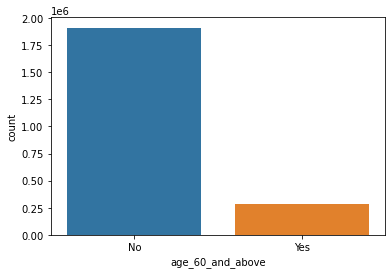

In [20]:
sns.countplot(x=large_symptoms_df.age_60_and_above)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

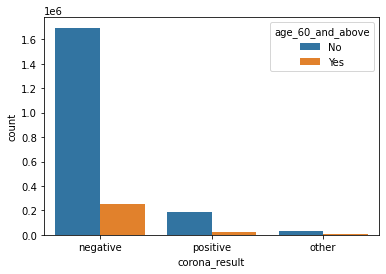

In [21]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='age_60_and_above')

<AxesSubplot:xlabel='corona_result,age_60_and_above'>

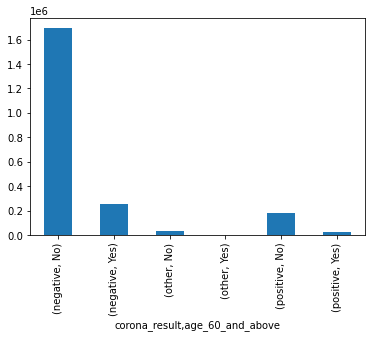

In [22]:
# this is the same as above. I wanted to see if groupby and countplot gives the same value. it does
large_symptoms_df.groupby(['corona_result', 'age_60_and_above']).age_60_and_above.count().plot(kind='bar')

In [23]:
# The percentage that is missing here is not really high, so using most frequent to fill the missing value will not bais the data
percentage_missingvalue_gender =  (92886/ 2742596)*100
percentage_missingvalue_gender

3.386791200745571

<AxesSubplot:xlabel='corona_result', ylabel='count'>

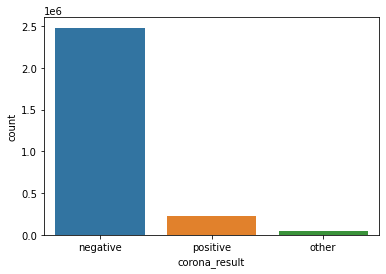

In [24]:
sns.countplot(x=large_symptoms_df.corona_result)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

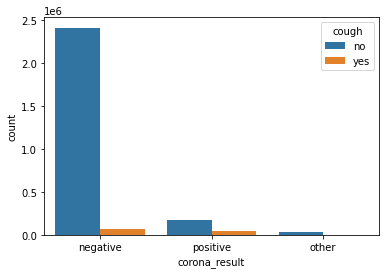

In [25]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='cough')

<AxesSubplot:xlabel='corona_result', ylabel='count'>

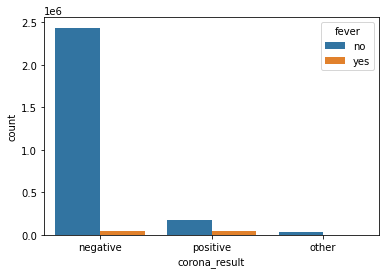

In [26]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='fever')

<AxesSubplot:xlabel='corona_result', ylabel='count'>

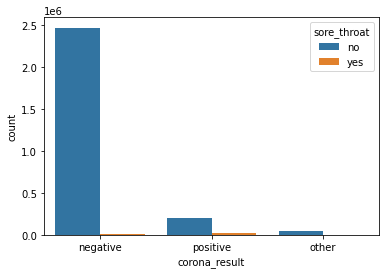

In [27]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='sore_throat')

<AxesSubplot:xlabel='corona_result', ylabel='count'>

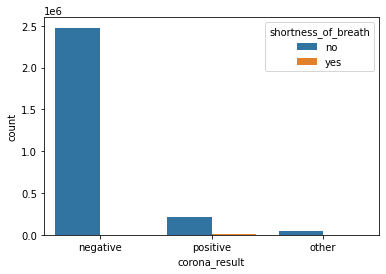

In [28]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='shortness_of_breath')

<AxesSubplot:xlabel='corona_result', ylabel='count'>

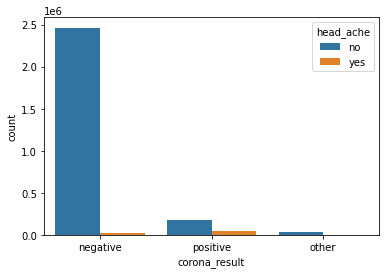

In [29]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='head_ache')

<AxesSubplot:xlabel='corona_result', ylabel='count'>

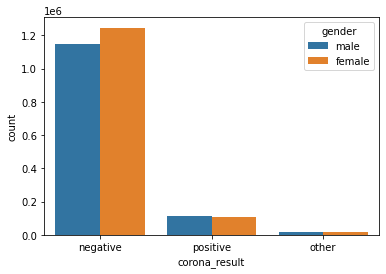

In [30]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='gender')

<AxesSubplot:xlabel='corona_result', ylabel='count'>

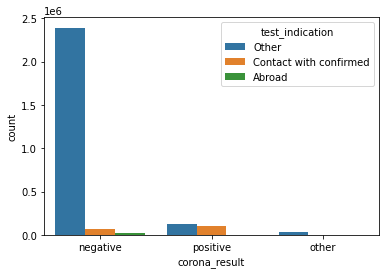

In [31]:
sns.countplot(x=large_symptoms_df.corona_result, data=large_symptoms_df, hue='test_indication')

<AxesSubplot:xlabel='corona_result,age_60_and_above'>

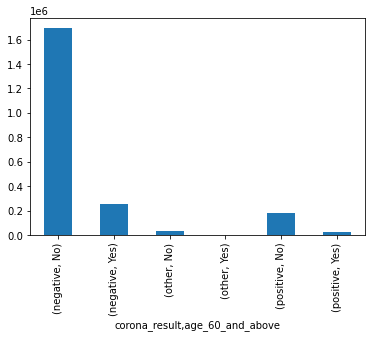

In [32]:
# this is the same as above. I wanted to see if groupby and countplot gives the same value. it does
large_symptoms_df.groupby(['corona_result', 'age_60_and_above']).age_60_and_above.count().plot(kind='bar')

In [33]:
large_symptoms_df.sort_values(by='test_date', inplace=True)

In [34]:
large_symptoms_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
2742595,2020-03-11,no,yes,no,no,no,negative,NaN,male,Other
2742346,2020-03-11,no,no,yes,no,no,positive,NaN,male,Abroad
2742347,2020-03-11,yes,no,no,no,no,negative,NaN,male,Other
2742348,2020-03-11,no,no,no,no,no,negative,NaN,male,Abroad
2742349,2020-03-11,no,no,no,yes,no,negative,NaN,male,Abroad
...,...,...,...,...,...,...,...,...,...,...
10084,2020-11-12,no,no,no,no,no,negative,No,female,Other
10083,2020-11-12,no,no,no,no,no,negative,No,female,Other
10082,2020-11-12,no,no,no,no,no,negative,No,female,Other
10094,2020-11-12,no,no,no,no,yes,positive,No,female,Contact with confirmed


In [35]:
corr = large_symptoms_df.corr(method='pearson')
corr

""


In [38]:
# sns.heatmap(corr)

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
# I droped gender because I used it before and has no effect on the model
X = large_symptoms_df.drop(['test_date', 'corona_result', 'gender'], axis=1)
X 

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
2742595,no,yes,no,no,no,NaN,Other
2742346,no,no,yes,no,no,NaN,Abroad
2742347,yes,no,no,no,no,NaN,Other
2742348,no,no,no,no,no,NaN,Abroad
2742349,no,no,no,yes,no,NaN,Abroad
...,...,...,...,...,...,...,...
10084,no,no,no,no,no,No,Other
10083,no,no,no,no,no,No,Other
10082,no,no,no,no,no,No,Other
10094,no,no,no,no,yes,No,Contact with confirmed


In [42]:
y = large_symptoms_df['corona_result']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [44]:
X_train.shape,  y_train.shape


((2194076, 7), (2194076,))

In [45]:
X_test.shape, y_test.shape

((548520, 7), (548520,))

In [46]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [48]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [51]:

feature_transformer = ColumnTransformer([
#     ( 'not_needed', 'drop', ['test_indication']),
    ('cat_preprocessing', cat_pipe, ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache','age_60_and_above', 'test_indication'])
    
    
])

In [52]:
X_train_trans = feature_transformer.fit_transform(X_train)
X_train_trans

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [53]:
X_train_trans.shape

(2194076, 15)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
m = LogisticRegression()

In [56]:
m.fit(X_train_trans, y_train)

LogisticRegression()

In [57]:
round(m.score(X_train_trans, y_train),2)

0.92

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cross_val_score(m, X_train_trans, y_train)

array([0.91529024, 0.91577544, 0.9156934 , 0.91531055, 0.91494138])

In [60]:
X_test_trans = feature_transformer.transform(X_test) 

In [61]:
round(m.score(X_test_trans, y_test),2)

0.92

In [62]:
# lets try another ML model

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RF_model = RandomForestClassifier(n_estimators=100, max_depth=3)
RF_model.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=3)

In [65]:
round(RF_model.score(X_train_trans, y_train),2)

0.92

In [81]:
cross_val_score(RF_model, X_train_trans, y_train)

array([0.91549533, 0.91576405, 0.91711997, 0.91565238, 0.91658216])

In [66]:
round(RF_model.score(X_test_trans, y_test),2)

0.92

In [67]:
RF_model.feature_importances_

array([0.02147545, 0.02330713, 0.06631134, 0.08446014, 0.02002384,
       0.04308106, 0.00354227, 0.00434007, 0.10529215, 0.11739616,
       0.0007225 , 0.00080168, 0.00992449, 0.29689243, 0.20242928])

In [68]:
X.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'test_indication'],
      dtype='object')

<BarContainer object of 15 artists>

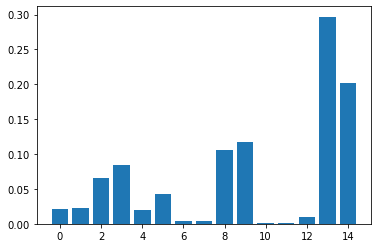

In [70]:
plt.bar(x=range(15),height= RF_model.feature_importances_)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
hyperparams = {
    'n_estimators': [50,100,200,300], 
    'max_depth': [3,10,50,100],
}

In [74]:
g = GridSearchCV(RF_model, hyperparams, cv = 5)

In [75]:
g.fit(X_train_trans, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=3),
             param_grid={'max_depth': [3, 10, 50, 100],
                         'n_estimators': [50, 100, 200, 300]})

In [76]:
g.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=300)

In [77]:
g.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [78]:
g.best_score_

0.9216152951598092

In [79]:
g.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [88]:
import joblib

In [89]:
joblib.dump(g.best_estimator_, 'model1_RF.pkl')

['model1_RF.pkl']

In [ ]:
with open('./model_RF.pkl', 'rb') as file:
    model_RF = pickle.load(file)

In [ ]:
# joblib.load("model_RF.pkl")

In [ ]:
# model_RF= joblib.load("model_RF.pkl")

In [103]:
from sklearn.pipeline import Pipeline

In [137]:
rf_pipeline = Pipeline(steps = [
    ('preprocessor', feature_transformer),
    ('regressor', RandomForestClassifier(n_estimators=100, max_depth=3))
])

In [138]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_preprocessing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['cough', 'fever',
                                                   'sore_throat',
                                                   'shortness_of_breath',
                                                   'head_ache',
                                                   'age_60_and_above',
                                                   'test_indication'])

In [139]:
round(rf_pipeline.score(X_train, y_train),2)

0.92

In [140]:
cross_val_score(rf_pipeline, X_train, y_train)

array([0.91529935, 0.91574126, 0.91593724, 0.91659127, 0.91519433])

In [141]:
round(rf_pipeline.score(X_test, y_test),2)

0.92

In [142]:
joblib.dump(rf_pipeline, 'random_forest_pipeline2.pkl')

['random_forest_pipeline2.pkl']

In [143]:
new_model= joblib.load("random_forest_pipeline2.pkl")

In [ ]:

# function for transfroming data for model_RF


In [ ]:

# cough ='yes'
# fever ='yes'
# sore_throat = 'yes'
# shortness_of_breath = 'yes'
# head_ache = 'no'
# age_60_and_above = 'yes'
# # gender =
# test_indication = 'Other'

# def convert_input_to_dataframe(cough, fever, sore_throat, shortness_of_breath, head_ache,
#        age_60_and_above, gender, test_indication):
#     '''
#     function to conver the input data of users into a dataframe that can be used to predict outcome
#     '''
#     user_input = {
#     'cough': cough, 
#     'fever': fever,
#     'sore_throat': sore_throat,
#     'shortness_of_breath': shortness_of_breath,
#     'head_ache': head_ache,
#     'age_60_and_above': age_60_and_above, 
#     'test_indication': test_indication
#     } 
#     dataframe = pd.DataFrame([user_input])
#     return dataframe
    

# def predict_symptoms_outcome(dataframe):
#     '''
#     This function loads the model random forest model of symptoms and predict using user dataframe
#     '''
#     model_RF= joblib.load("model_RF.pkl")
#     predicted_symptoms = model_RF.predict(transformed_array)
#     return predicted_symptoms
    



In [144]:

def convert_symptoms_to_dataframe(cough, fever, sore_throat, shortness_of_breath, head_ache,
       age_60_and_above, test_indication):
    '''
    function to conver the input data of users into a dataframe that can be used to predict outcome
    '''
    user_input = {
    'cough': cough, 
    'fever': fever,
    'sore_throat': sore_throat,
    'shortness_of_breath': shortness_of_breath,
    'head_ache': head_ache,
    'age_60_and_above': age_60_and_above, 
    'test_indication': test_indication
    } 
    dataframe = pd.DataFrame([user_input])
    return dataframe

In [161]:
cough = 'no'
fever = 'yes'
sore_throat = 'no'
shortness_of_breath = 'no'
head_ache = 'no'
age_60_and_above = 'no'
test_indication = 'Contact with confirmed'


In [162]:
df=convert_symptoms_to_dataframe(cough, fever, sore_throat, shortness_of_breath, head_ache,
       age_60_and_above, test_indication)
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
0,no,yes,no,no,no,no,Contact with confirmed


In [163]:
result = new_model.predict(df)

In [164]:
result[0]

'positive'

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'